### What makes us happy?

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. The first report was published in 2012, since that time every year a new report is published. Citizens are asked to rate their perceptions about six factors that affect their daily life. A happiness score is generated from the evaluations of these six factors plus a dystopia factor which defines a dystopic country that has the worst score.  

In this study, 2015, 2016 and 2017 data have been analyzed. The objective is to have a deep understanding about global happiness level and the factors affecting it. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [4]:
df1 = pd.read_csv('2015.csv')
df2 = pd.read_csv('2016.csv')
df3 = pd.read_csv('2017.csv')

### Data Cleaning

There is not a `Year` column in the files, so we add a new `Year` column. 

In [5]:
df1['Year'] = 2015
df2['Year'] = 2016
df3['Year'] = 2017

There are mismatched column names in data. We have to fix this issue. Also some of the columns are not necessary for our analysis such that `Standard Error` or `Confidence Interval` values. So, we will drop those columns. Columns will also be re-ordered. After handling missing values, we will combine seperate dataframes.  

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  Year                           158 non-null    int

In [7]:
# dropping unnecesarry columns
df1.drop(columns = 'Standard Error', inplace = True)

In [8]:
# reordering columns
df1 = df1.iloc[:,[11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [10]:
# dropping unnecesarry columns
df2 = df2.drop(columns = ['Lower Confidence Interval', 'Upper Confidence Interval'])

In [11]:
# reordering columns
df2 = df2.iloc[:,[11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
 12  Year                           155 non-null    int

In [13]:
# dropping unnecesarry columns
df3.drop(columns = ['Whisker.high', 'Whisker.low'], inplace = True)

In [14]:
# new columns names
Columns= ['Year', 'Country', 'Region', 'Happ_Rank', 'Happ_Score', 'GDP',\
          'Family', 'Life_Exp', 'Freedom', 'Generosity', 'Trust_Gov', 'Dystopia']

In [15]:
#assigning new columns
df1.columns = Columns

In [16]:
#assigning new columns
df2.columns = Columns

In [17]:
Regions = df1.Region.unique()

In [18]:
# filling missing region values also adding a new `Region` column
for region in Regions:
        for country in df1[df1.Region == region].Country.unique():
            df3.loc[(df3.Country == country) & (df3.Year == 2017), 'Region'] = region

In [19]:
# reordering columns
df3 = df3.iloc[:,[10, 0, 11, 1, 2, 3, 4, 5, 6, 7, 8, 9]]

In [20]:
#assigning new columns
df3.columns = Columns

In [21]:
# checking null values
df3[df3.Region.isnull()==True]

,Year,Country,Region,Happ_Rank,Happ_Score,GDP,Family,Life_Exp,Freedom,Generosity,Trust_Gov,Dystopia
32,2017,Taiwan Province of China,NaN,33,6.422,1.433627,1.384565,0.793984,0.361467,0.258360,0.063829,2.126607
49,2017,Belize,NaN,50,5.956,0.907975,1.081418,0.450192,0.547509,0.240016,0.096581,2.631956
70,2017,"Hong Kong S.A.R., China",NaN,71,5.472,1.551675,1.262791,0.943062,0.490969,0.374466,0.293934,0.554633
92,2017,Somalia,NaN,93,5.151,0.022643,0.721151,0.113989,0.602127,0.291631,0.282410,3.117485
110,2017,Namibia,NaN,111,4.574,0.964434,1.098471,0.338612,0.520304,0.077134,0.093147,1.481890
146,2017,South Sudan,NaN,147,3.591,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567


Some of the country names are mismatched with the remaining data. We fix them below. 

In [22]:
df3.loc[df3.Country == 'Taiwan Province of China', 'Country'] = 'Taiwan'
df3.loc[df3.Country == 'Hong Kong S.A.R., China', 'Country'] = 'Hong Kong'

Remaining NULL `Region` values were filled in the following. 

In [23]:
df3.loc[df3.Country == 'Taiwan','Region']= 'Eastern Asia'
df3.loc[df3.Country == 'Belize','Region']= 'Latin America and Caribbean'
df3.loc[df3.Country == 'Namibia','Region']= 'Sub-Saharan Africa'
df3.loc[df3.Country == 'South Sudan','Region']= 'Sub-Saharan Africa'
df3.loc[df3.Country == 'Somalia','Region']= 'Sub-Saharan Africa'
df3.loc[df3.Country == 'Hong Kong','Region']= 'Eastern Asia'

Now it is time to concatenate dataframes. 

In [24]:
df = pd.concat([df1, df2, df3], ignore_index = True)

In [25]:
df.head()

,Year,Country,Region,Happ_Rank,Happ_Score,GDP,Family,Life_Exp,Freedom,Generosity,Trust_Gov,Dystopia
0,2015,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2015,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2015,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,2015,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,2015,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [26]:
df.describe()

,Year,Happ_Rank,Happ_Score,GDP,Family,Life_Exp,Freedom,Generosity,Trust_Gov,Dystopia
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,2015.993617,78.829787,5.370728,0.927830,0.990347,0.579968,0.402828,0.175605,0.201426,2.092717
std,0.816907,45.281408,1.136998,0.415584,0.318707,0.240161,0.150356,0.131909,0.133211,0.565772
min,2015.000000,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,2015.000000,40.000000,4.509000,0.605292,0.793000,0.402301,0.297615,0.075792,0.098303,1.737975
50%,2016.000000,79.000000,5.282500,0.995439,1.025665,0.630053,0.418347,0.139081,0.181624,2.094640
75%,2017.000000,118.000000,6.233750,1.252443,1.228745,0.768298,0.516850,0.249839,0.275505,2.455575
max,2017.000000,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.838075,0.819710,3.837720


<AxesSubplot:>

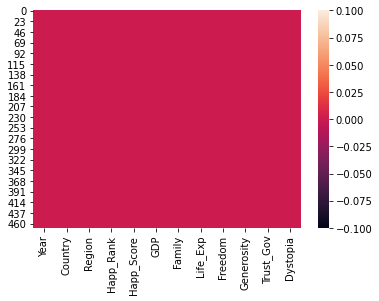

In [27]:
sns.heatmap(df.isnull())

There are no more NULL values. 

In [28]:
df.to_csv('happy_df.csv')

### Outlier Analysis

Let's first draw `Boxplot` for each variable.

In [1]:
df = pd.read_csv('happy_df.csv')

NameError: name 'pd' is not defined

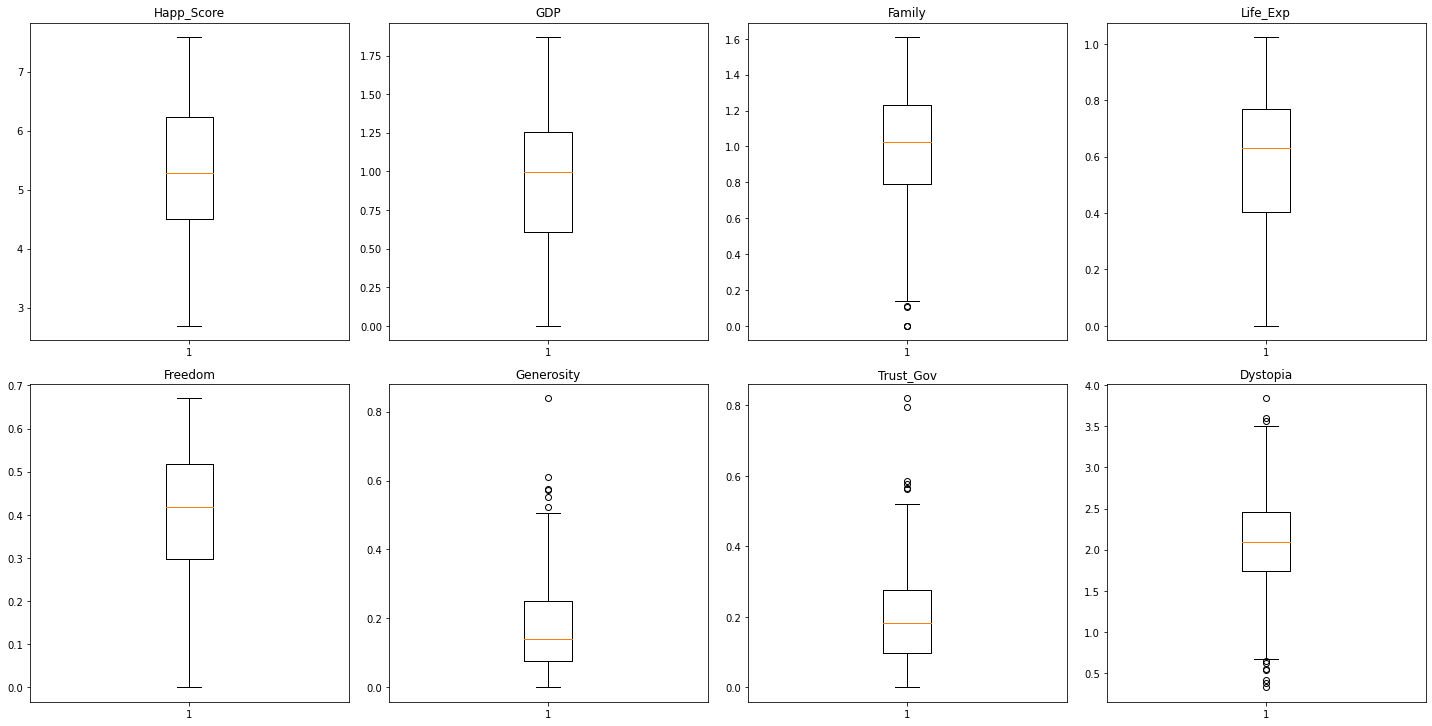

In [29]:
plt.figure(figsize=(20,20))
for i, col in enumerate(Columns[4:]):
    plt.subplot(4,4, i+1)
    plt.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

From box plots, we see that `Family`, `Generosity`, `Trust_Gov` and `Dystopia` variables have outliers. Let's continue with histogram to see how actually the data distributions are affected by outliers.

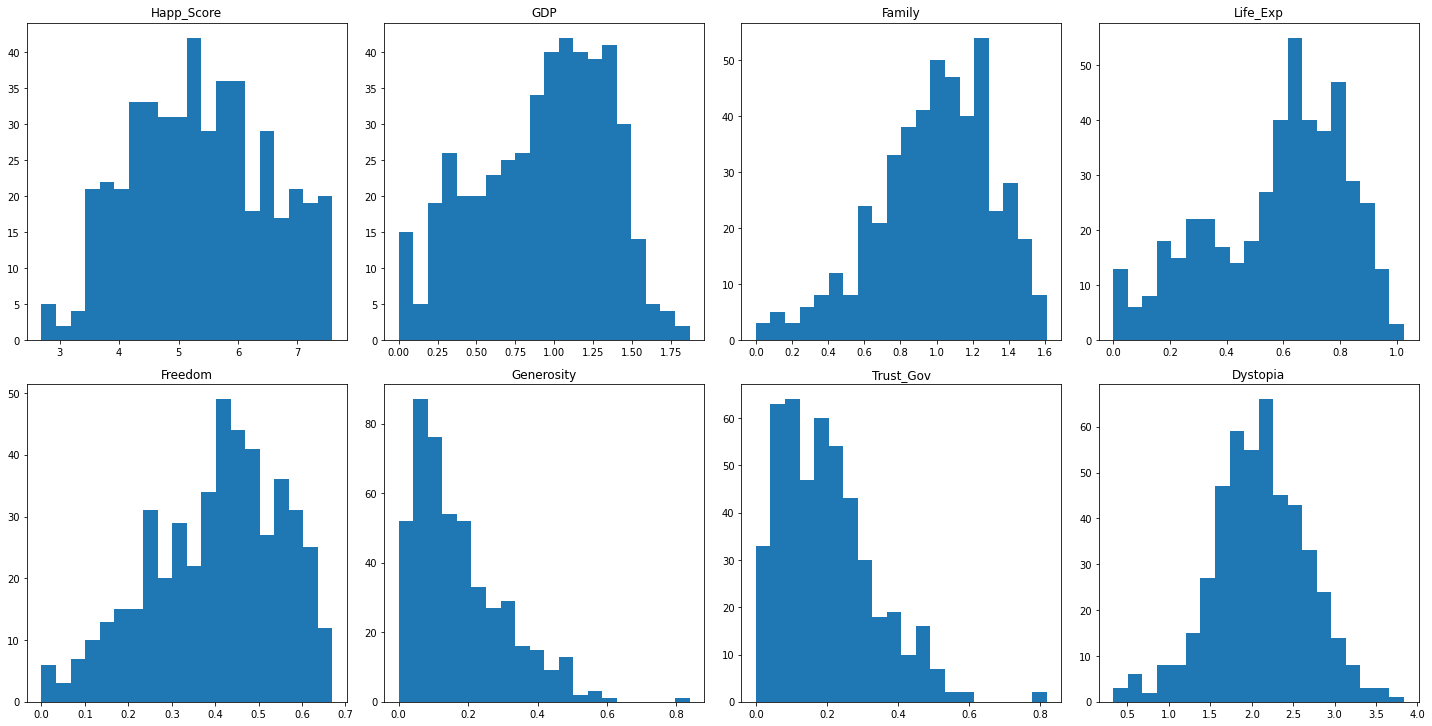

In [30]:
plt.figure(figsize=(20,20))
for i, col in enumerate(Columns[4:]):
    plt.subplot(4,4, i+1)
    plt.hist(df[col], bins=20)
    plt.title(col)
plt.tight_layout()
plt.show()

From histograms, we observe that `Family` is negatively skewed and `Generosity` and `Trust_Gov` are positively skewed. We may also expect that `Dystopia` has outliers in both tails. `Dystopia` seems like normally distributed but we can not state anything about the distributions of other variables by looking at histograms. 

Let's continue with some statistical analysis. We are going to use `z-score` method to detect outliers. 

Since `Family` is negatively skewed, we must focus on the negative values of `z-scores`. From the analysis, we found out that when we set the `z_score` threshold as -3, there are 3 data points beyond this threshold value. Therefore we may accept them as outliers. 

In [31]:
from scipy.stats import zscore

z_scores = zscore(df["Family"])
for threshold in np.arange(1,5,1):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores < -threshold)[0]))))
    print('------')

Threshold value: 1
Number of Outliers: 74
------
Threshold value: 2
Number of Outliers: 18
------
Threshold value: 3
Number of Outliers: 3
------
Threshold value: 4
Number of Outliers: 0
------


In [32]:
df.Family.sort_values().head(10)

469    0.00000
147    0.00000
312    0.00000
310    0.10419
311    0.11037
157    0.13995
289    0.14700
313    0.14866
300    0.18519
283    0.19249
Name: Family, dtype: float64

In [35]:
import plotly.express as px

In [36]:
fig = px.box(df, y='Family', hover_name='Country', points='all')
fig.show()

We observe from the above plot that Togo has one zero point for Family variable and Central African Republic have two zero points. This may be caused because of missing information. Other informations about these two countries are seen below.   

In [34]:
df[df.Country == 'Togo']

,Year,Country,Region,Happ_Rank,Happ_Score,GDP,Family,Life_Exp,Freedom,Generosity,Trust_Gov,Dystopia
157,2015,Togo,Sub-Saharan Africa,158,2.839,0.208680,0.139950,0.284430,0.364530,0.107310,0.166810,1.567260
312,2016,Togo,Sub-Saharan Africa,155,3.303,0.281230,0.000000,0.248110,0.346780,0.115870,0.175170,2.135400
464,2017,Togo,Sub-Saharan Africa,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229


In [35]:
df[df.Country == 'Central African Republic']

,Year,Country,Region,Happ_Rank,Happ_Score,GDP,Family,Life_Exp,Freedom,Generosity,Trust_Gov,Dystopia
147,2015,Central African Republic,Sub-Saharan Africa,148,3.678,0.0785,0.0,0.066990,0.488790,0.082890,0.238350,2.722300
469,2017,Central African Republic,Sub-Saharan Africa,155,2.693,0.0000,0.0,0.018773,0.270842,0.280876,0.056565,2.066005


Now we make the same analysis for `Generosity` variable. When we set threshold as 3, there are 5 points beyong this threshold. 

In [36]:
from scipy.stats import zscore

z_scores = zscore(df["Generosity"])
for threshold in range(1,5):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Threshold value: 1
Number of Outliers: 84
------
Threshold value: 2
Number of Outliers: 22
------
Threshold value: 3
Number of Outliers: 4
------
Threshold value: 4
Number of Outliers: 1
------


In [37]:
df.Generosity.sort_values(ascending=False).head(10)

428    0.838075
395    0.611705
341    0.574731
346    0.572123
153    0.551910
27     0.522080
309    0.505210
322    0.500005
466    0.493664
333    0.492774
Name: Generosity, dtype: float64

In [119]:
fig = px.box(df, y='Generosity', hover_name='Country', points='all')
fig.show()

Countries that have outliers for `Generosity` variable are Myanmar, Indonesia, Malta, Thailand and Rwanda.  Myanmar, Indonesia, Malta and Thailand have exceptional increase of `Generosity` in 2017 while `GDP` scores were relatively stable. `Generosity` is measured by recent donations. In 2017, in Myanmar, there have been several attacks against minority groups in the country. In Indonesia and Thailand there were several natural disasters in this year. One may expect that these incidents may promote an extreme increase in donations. Therefore  we can accept those values as outliers. In contrast, Rwanda has a decreasing trend in `Generosity`. 

In [39]:
df[df.Country == 'Myanmar']

,Year,Country,Region,Happ_Rank,Happ_Score,GDP,Family,Life_Exp,Freedom,Generosity,Trust_Gov,Dystopia
128,2015,Myanmar,Southeastern Asia,129,4.307,0.271080,0.709050,0.482460,0.440170,0.190340,0.795880,1.41805
276,2016,Myanmar,Southeastern Asia,119,4.395,0.341120,0.699810,0.398800,0.426920,0.202430,0.819710,1.50655
428,2017,Myanmar,Southeastern Asia,114,4.545,0.367111,1.123236,0.397523,0.514492,0.838075,0.188816,1.11529


In [40]:
df[df.Country=='Indonesia']

,Year,Country,Region,Happ_Rank,Happ_Score,GDP,Family,Life_Exp,Freedom,Generosity,Trust_Gov,Dystopia
73,2015,Indonesia,Southeastern Asia,74,5.399,0.828270,1.087080,0.637930,0.466110,0.000000,0.515350,1.863990
236,2016,Indonesia,Southeastern Asia,79,5.314,0.951040,0.876250,0.493740,0.392370,0.003220,0.565210,2.031710
395,2017,Indonesia,Southeastern Asia,81,5.262,0.995539,1.274445,0.492346,0.443323,0.611705,0.015317,1.429477


In [41]:
df[df.Country=='Malta']

,Year,Country,Region,Happ_Rank,Happ_Score,GDP,Family,Life_Exp,Freedom,Generosity,Trust_Gov,Dystopia
36,2015,Malta,Western Europe,37,6.302,1.20740,1.302030,0.887210,0.603650,0.135860,0.517520,1.648800
187,2016,Malta,Western Europe,30,6.488,1.30782,1.098790,0.803150,0.549940,0.175540,0.562370,1.990320
341,2017,Malta,Western Europe,27,6.527,1.34328,1.488412,0.821944,0.588767,0.574731,0.153066,1.556863


In [42]:
df[df.Country=='Thailand']

,Year,Country,Region,Happ_Rank,Happ_Score,GDP,Family,Life_Exp,Freedom,Generosity,Trust_Gov,Dystopia
33,2015,Thailand,Southeastern Asia,34,6.455,0.966900,1.265040,0.738500,0.556640,0.031870,0.576300,2.319450
190,2016,Thailand,Southeastern Asia,33,6.474,1.089300,1.044770,0.649150,0.495530,0.028330,0.586960,2.579600
346,2017,Thailand,Southeastern Asia,32,6.424,1.127869,1.425792,0.647239,0.580201,0.572123,0.031613,2.039508


In [43]:
df[df.Country=='Rwanda']

,Year,Country,Region,Happ_Rank,Happ_Score,GDP,Family,Life_Exp,Freedom,Generosity,Trust_Gov,Dystopia
153,2015,Rwanda,Sub-Saharan Africa,154,3.465,0.222080,0.773700,0.428640,0.592010,0.551910,0.22628,0.670420
309,2016,Rwanda,Sub-Saharan Africa,152,3.515,0.328460,0.615860,0.318650,0.543200,0.505210,0.23552,0.968190
465,2017,Rwanda,Sub-Saharan Africa,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.45522,0.540061


In [44]:
from scipy.stats import zscore

z_scores = zscore(df["Trust_Gov"])
for threshold in range(1,5):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Threshold value: 1
Number of Outliers: 69
------
Threshold value: 2
Number of Outliers: 24
------
Threshold value: 3
Number of Outliers: 2
------
Threshold value: 4
Number of Outliers: 2
------


In [45]:
df['Trust_Gov'].sort_values(ascending=False)

276    0.819710
128    0.795880
190    0.586960
33     0.576300
236    0.565210
         ...   
371    0.004388
63     0.001990
101    0.000000
256    0.000000
404    0.000000
Name: Trust_Gov, Length: 470, dtype: float64

In [120]:
fig=px.box(df, y='Trust_Gov', hover_name='Country', points='all')
fig.show()

Myanmar and Thailand have exceptionally high values for `Trust_Gov` variable in 2015 and 2016. Both countries have a dramatic decrease in the following year. 

In [47]:
from scipy.stats import zscore

z_scores = zscore(df["Dystopia"])
for threshold in range(1,5):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores > threshold) [0]))))
    print('------')

Threshold value: 1
Number of Outliers: 76
------
Threshold value: 2
Number of Outliers: 9
------
Threshold value: 3
Number of Outliers: 1
------
Threshold value: 4
Number of Outliers: 0
------


In [48]:
df.Dystopia.sort_values(ascending=False).head()

233    3.83772
13     3.60214
178    3.55906
174    3.50733
195    3.40904
Name: Dystopia, dtype: float64

In [122]:
df[df.Country=='Somalia']

,Year,Country,Region,Happ_Rank,Happ_Score,GDP,Family,Life_Exp,Freedom,Generosity,Trust_Gov,Dystopia
233,2016,Somalia,Sub-Saharan Africa,76,5.440,0.000000,0.336130,0.114660,0.567780,0.311800,0.27225,3.837720
407,2017,Somalia,Sub-Saharan Africa,93,5.151,0.022643,0.721151,0.113989,0.602127,0.291631,0.28241,3.117485


In [50]:
from scipy.stats import zscore

z_scores = zscore(df["Dystopia"])
for threshold in range(1,5):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores < -threshold) [0]))))
    print('------')

Threshold value: 1
Number of Outliers: 63
------
Threshold value: 2
Number of Outliers: 14
------
Threshold value: 3
Number of Outliers: 2
------
Threshold value: 4
Number of Outliers: 0
------


In [51]:
df.Dystopia.sort_values().head(10)

155    0.328580
456    0.377914
434    0.419389
465    0.540061
385    0.554633
467    0.621130
71     0.654290
153    0.670420
131    0.671080
446    0.814382
Name: Dystopia, dtype: float64

In [121]:
fig=px.box(df, y='Dystopia', hover_name='Country', points='all')
fig.show()

In [53]:
df[df.Country=='Syria']

,Year,Country,Region,Happ_Rank,Happ_Score,GDP,Family,Life_Exp,Freedom,Generosity,Trust_Gov,Dystopia
155,2015,Syria,Middle East and Northern Africa,156,3.006,0.663200,0.474890,0.721930,0.156840,0.189060,0.471790,0.328580
313,2016,Syria,Middle East and Northern Africa,156,3.069,0.747190,0.148660,0.629940,0.069120,0.172330,0.483970,0.817890
466,2017,Syria,Middle East and Northern Africa,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574


In [54]:
df[df.Country=='Botswana']

,Year,Country,Region,Happ_Rank,Happ_Score,GDP,Family,Life_Exp,Freedom,Generosity,Trust_Gov,Dystopia
127,2015,Botswana,Sub-Saharan Africa,128,4.332,0.993550,1.104640,0.047760,0.494950,0.124740,0.104610,1.461810
294,2016,Botswana,Sub-Saharan Africa,137,3.974,1.094260,0.891860,0.347520,0.440890,0.107690,0.124250,0.967410
456,2017,Botswana,Sub-Saharan Africa,142,3.766,1.122094,1.221555,0.341756,0.505196,0.099348,0.098583,0.377914


We can remove outliers by winsorizing them with respect to threshold values.

In [26]:
from scipy.stats.mstats import winsorize

Winsorized_Family = winsorize(np.array(df['Family']), (0.01, 0))
Winsorized_Generosity = winsorize(np.array(df['Generosity']), (0, 0.01))
Winsorized_Trust_Gov = winsorize(np.array(df['Trust_Gov']), (0, 0.01))
Winsorized_Dystopia = winsorize(np.array(df['Dystopia']), (0.005, 0.005))


In [27]:
df_win = df.copy()
df_win['Winsorized_Family'] = Winsorized_Family
df_win['Winsorized_Generosity'] = Winsorized_Generosity
df_win['Winsorized_Trust_Gov'] = Winsorized_Trust_Gov
df_win['Winsorized_Dystopia'] = Winsorized_Dystopia

Below, we see boxplot of variables before and after winsorization. There are still some outliers but we decided to keep them in the model since they may have relevant information about the data. 

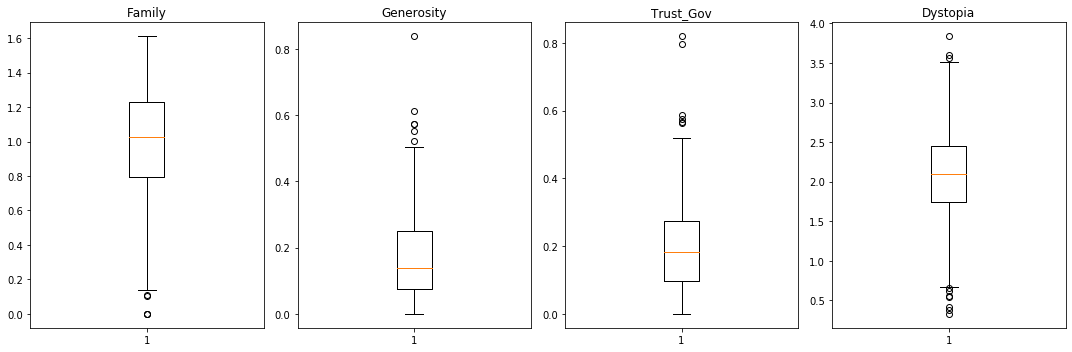

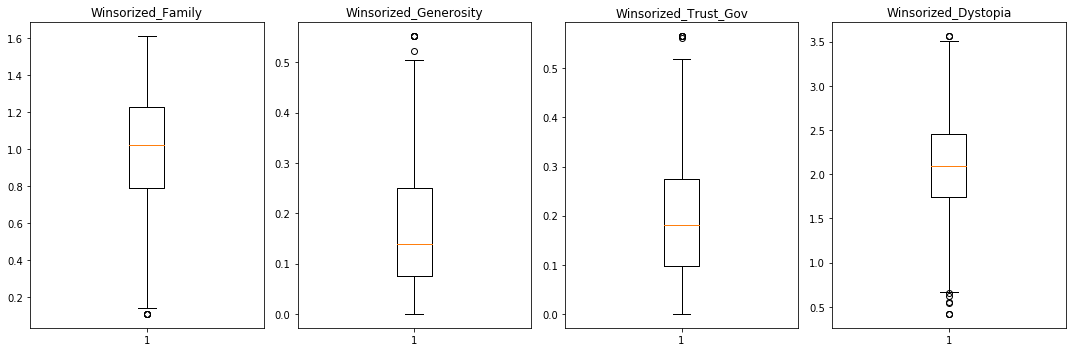

In [57]:
plt.figure(figsize=(15,5))
for i, col in enumerate(['Family', 'Generosity', 'Trust_Gov', 'Dystopia']):
    plt.subplot(1,4, i+1)
    plt.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,5))
for i, col in enumerate(['Winsorized_Family', 'Winsorized_Generosity', 'Winsorized_Trust_Gov', 'Winsorized_Dystopia']):
    plt.subplot(1,4, i+1)
    plt.boxplot(df_win[col])
    plt.title(col)
plt.tight_layout()
plt.show()




In [28]:
df_win.describe()

,Year,Happ_Rank,Happ_Score,GDP,Family,Life_Exp,Freedom,Generosity,Trust_Gov,Dystopia,Winsorized_Family,Winsorized_Generosity,Winsorized_Trust_Gov,Winsorized_Dystopia
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,2015.993617,78.829787,5.370728,0.927830,0.990347,0.579968,0.402828,0.175605,0.201426,2.092717,0.991064,0.174778,0.200323,2.092314
std,0.816907,45.281408,1.136998,0.415584,0.318707,0.240161,0.150356,0.131909,0.133211,0.565772,0.316591,0.128806,0.129181,0.562984
min,2015.000000,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,0.110370,0.000000,0.000000,0.419389
25%,2015.000000,40.000000,4.509000,0.605292,0.793000,0.402301,0.297615,0.075792,0.098303,1.737975,0.793000,0.075792,0.098303,1.737975
50%,2016.000000,79.000000,5.282500,0.995439,1.025665,0.630053,0.418347,0.139081,0.181624,2.094640,1.025665,0.139081,0.181624,2.094640
75%,2017.000000,118.000000,6.233750,1.252443,1.228745,0.768298,0.516850,0.249839,0.275505,2.455575,1.228745,0.249839,0.275505,2.455575
max,2017.000000,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.838075,0.819710,3.837720,1.610574,0.551910,0.565210,3.559060


### Variable Analysis

Let's start with `Happ_Score`. We can have a look at `Happ_Score` for every region.

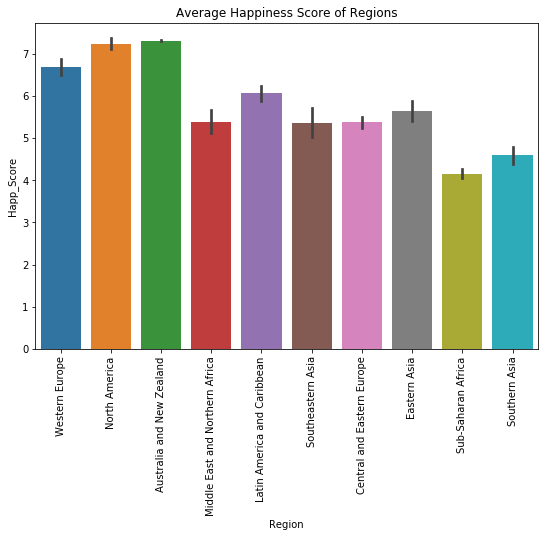

In [59]:
plt.figure(figsize=(9, 6))
sns.barplot(x = 'Region', y = 'Happ_Score', data = df_win)
plt.xticks(rotation = 90)
plt.title('Average Happiness Score of Regions')
plt.show()

'Australia and New Zealand', 'North America' and 'Western Europe' are the happiest regions according to the plot. 'Sub-Saharan Africa' and 'Southern Asia' have the lowest scores. 

Let's convert happiness score into a categorical variable .

In [60]:
targets = ['Low', 'Mid', 'Top']
df_win['Target_Happ'] = pd.qcut(df_win['Happ_Score'], len(targets), labels=targets)

In [61]:
df_win.head()

,Year,Country,Region,Happ_Rank,Happ_Score,GDP,Family,Life_Exp,Freedom,Generosity,Trust_Gov,Dystopia,Winsorized_Family,Winsorized_Generosity,Winsorized_Trust_Gov,Winsorized_Dystopia,Target_Happ
0,2015,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1.34951,0.41978,0.29678,2.51738,Top
1,2015,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,1.40223,0.14145,0.43630,2.70201,Top
2,2015,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,1.36058,0.48357,0.34139,2.49204,Top
3,2015,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,1.33095,0.36503,0.34699,2.46531,Top
4,2015,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,1.32261,0.32957,0.45811,2.45176,Top


Now we have a `Target_Happ` variable. Let's look at the pairwise comparisons of all variables affecting happiness.

In [62]:
df_pp = df_win[['Happ_Score', 'Target_Happ', 'GDP', 'Life_Exp', 'Freedom', \
                'Winsorized_Family', 'Winsorized_Generosity', 'Winsorized_Trust_Gov', 'Winsorized_Dystopia' ]]

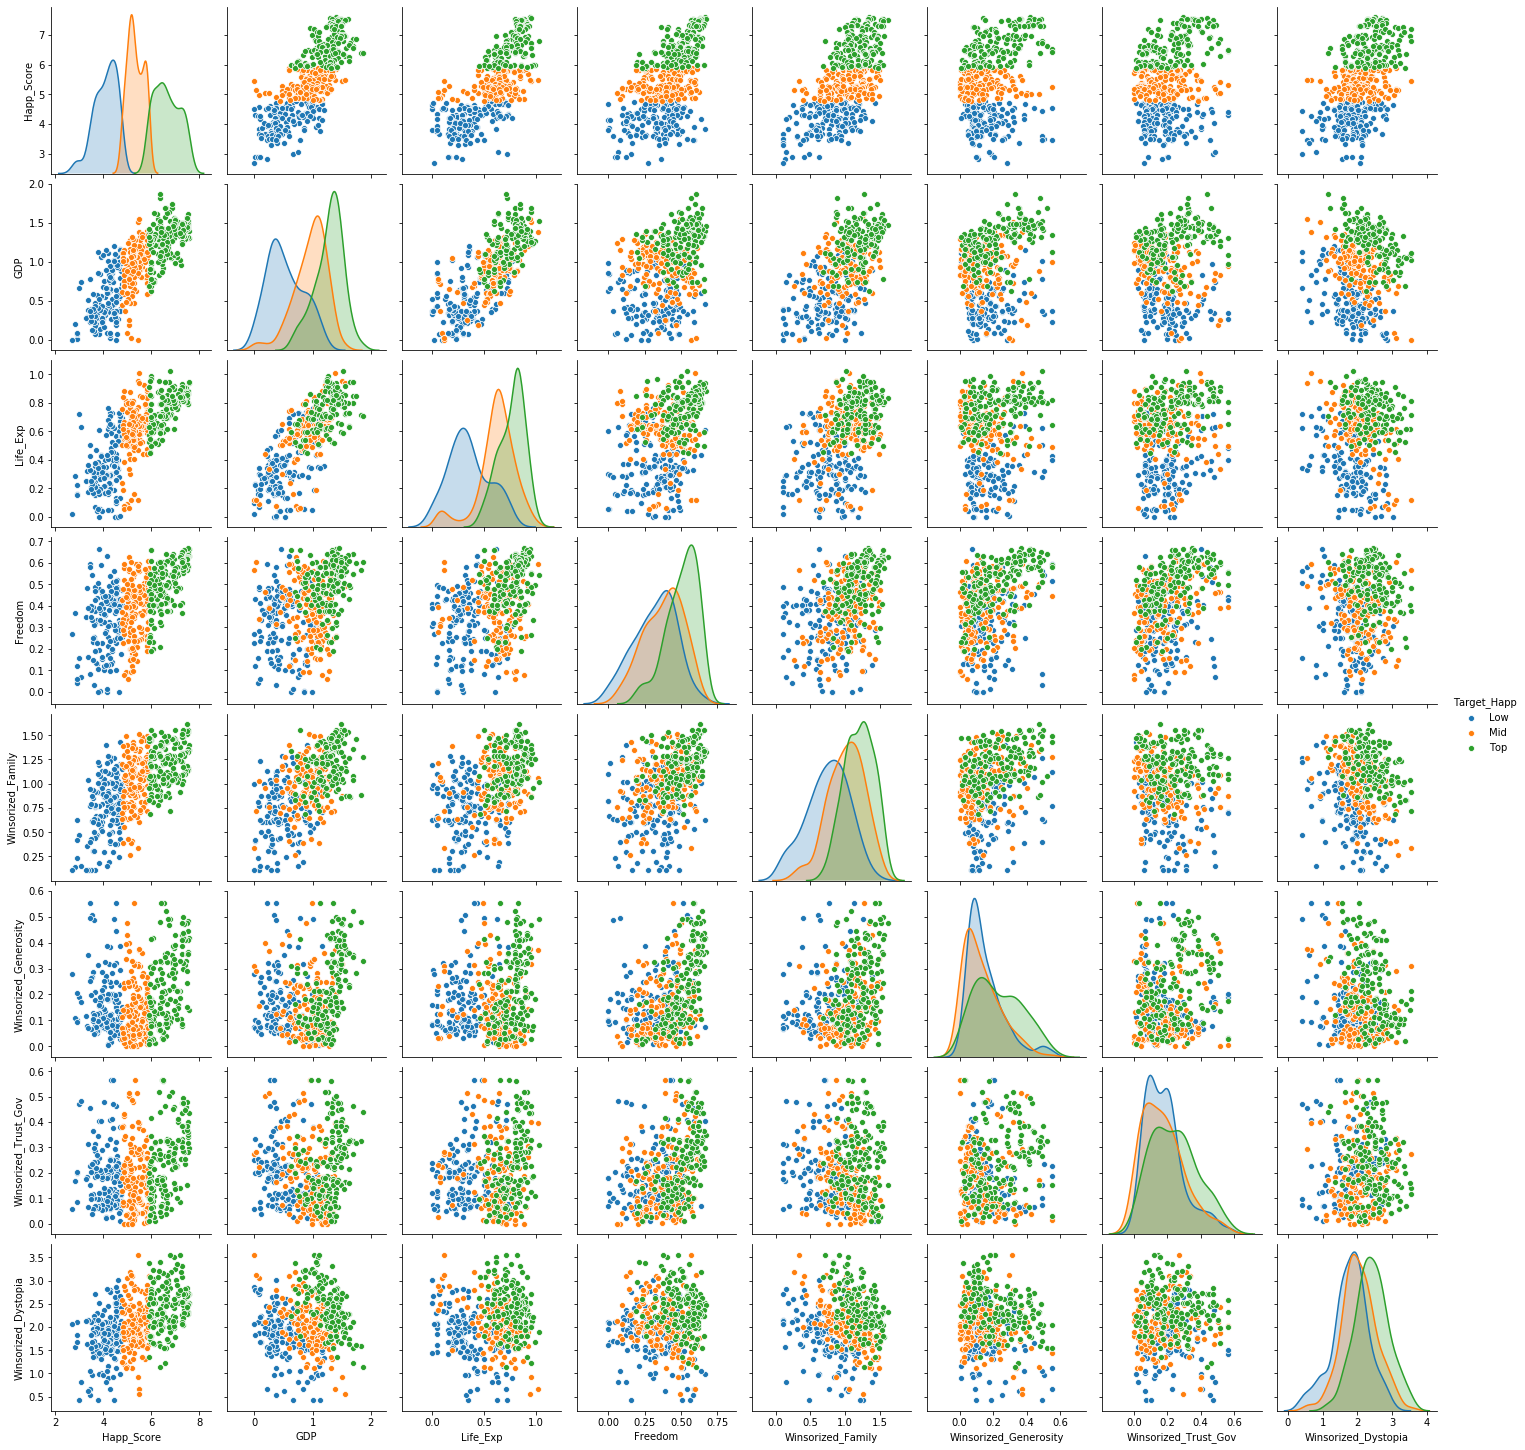

In [63]:
sns.pairplot(data=df_pp, hue='Target_Happ')
plt.show()

From the pairplot, we see that `Happ_Score` is highly correlated with `GDP`, `Family` and `Life_Exp` which is not a big surprise. According to Maslow's Hierarchy of Needs, the first three levels of needs are Physiological, Safety and Love/Belonging. Physiological Needs are our basic needs to survive like food, water, shelter etc. To satisfy Physiological Needs, people need enough money and a country with strong economy. Safety Needs contain personal security, health, employment etc. which are both related to `GDP` and `Life_Exp` factors in our analysis. Third level which is Love/Belonging Needs are about sense of connection with somebody, a group or a society and it refers to `Family` variable in the dataset. Therefore, the first implications from the dataset are quite compatible with relevant literature. `Happ_Score` also has fair correlation with `Freedom`. 

We also observe that `GDP` is highly correlated with `Family` and `Life_Exp` and has a moderate correlation with `Freedom`. `Trust_Gov` and `Generosity` are not correlated neither with `Happ_Score` and nor with any other variables. 

Let's look at the basic correlation matrix of variables. 

In [69]:
df_corr = df_win[['Happ_Score', 'GDP', 'Winsorized_Family',
       'Life_Exp', 'Freedom', 'Winsorized_Generosity', 'Winsorized_Trust_Gov', 'Winsorized_Dystopia']]

df_corr = df_corr.corr()
df_corr

,Happ_Score,GDP,Winsorized_Family,Life_Exp,Freedom,Winsorized_Generosity,Winsorized_Trust_Gov,Winsorized_Dystopia
Happ_Score,1.000000,0.785450,0.636508,0.748040,0.560353,0.291768,0.235245,0.490910
GDP,0.785450,1.000000,0.584973,0.792224,0.344962,0.211386,0.052433,0.032410
Winsorized_Family,0.636508,0.584973,1.000000,0.485217,0.427714,0.294509,-0.080445,-0.079859
Life_Exp,0.748040,0.792224,0.485217,1.000000,0.359566,0.142722,0.170963,0.059893
Freedom,0.560353,0.344962,0.427714,0.359566,1.000000,0.411027,0.355750,0.036913
Winsorized_Generosity,0.291768,0.211386,0.294509,0.142722,0.411027,1.000000,0.090839,-0.158566
Winsorized_Trust_Gov,0.235245,0.052433,-0.080445,0.170963,0.355750,0.090839,1.000000,0.058138
Winsorized_Dystopia,0.490910,0.032410,-0.079859,0.059893,0.036913,-0.158566,0.058138,1.000000


Correlation matrix shows that `GDP` is the most correlated variable with `Happ_Score`. `Life_Exp`, `Family` and `Freedom`  are the other most correlated variables respectively. We obtained similar findings with the inferences from the above pairplot. 

In the following, we have grouped the data according to regions.

In [70]:
df_region = df_win.groupby('Region').mean().reset_index()
df_region

,Region,Year,Happ_Rank,Happ_Score,GDP,Family,Life_Exp,Freedom,Generosity,Trust_Gov,Dystopia,Winsorized_Family,Winsorized_Generosity,Winsorized_Trust_Gov,Winsorized_Dystopia
0,Australia and New Zealand,2016.000000,9.000000,7.302500,1.379828,1.327446,0.863789,0.609355,0.417607,0.427118,2.277401,1.327446,0.417607,0.427118,2.277401
1,Central and Eastern Europe,2016.000000,77.505747,5.371184,1.027342,1.065728,0.662152,0.335135,0.120287,0.134260,2.026250,1.065728,0.120287,0.134260,2.026250
2,Eastern Asia,2015.941176,65.176471,5.641765,1.231481,1.097774,0.824193,0.417093,0.142890,0.179015,1.749422,1.097774,0.142890,0.179015,1.749422
3,Latin America and Caribbean,2016.000000,48.661765,6.069074,0.960079,1.091907,0.641650,0.458245,0.143492,0.172418,2.601250,1.091907,0.143492,0.172418,2.600616
4,Middle East and Northern Africa,2015.982759,77.379310,5.387879,1.123945,0.904168,0.643763,0.345383,0.180816,0.175661,2.014162,0.904168,0.180816,0.175661,2.015728
5,North America,2016.000000,10.000000,7.227167,1.449062,1.269152,0.830477,0.558530,0.296426,0.356880,2.466653,1.269152,0.296426,0.356880,2.466653
6,Southeastern Asia,2015.961538,78.500000,5.364077,0.880421,0.984215,0.607841,0.527108,0.242050,0.338824,1.783628,0.984215,0.227967,0.318901,1.783628
7,Southern Asia,2016.000000,111.571429,4.590857,0.639545,0.685964,0.483719,0.374111,0.182960,0.262592,1.961907,0.685964,0.182960,0.262592,1.961907
8,Sub-Saharan Africa,2015.991453,128.461538,4.150957,0.451379,0.787394,0.249353,0.345589,0.157982,0.182643,1.976592,0.790277,0.157982,0.182643,1.974565
9,Western Europe,2016.000000,28.619048,6.693000,1.391021,1.244900,0.853192,0.514213,0.255835,0.275274,2.158601,1.244900,0.255472,0.275274,2.158601


Let's look at the lowest and highest 10 countries in terms of their happiness scores between 2015-2017. 

In [72]:
country_group = df_win.groupby('Country').mean()
lowest_10 = country_group.sort_values(by='Happ_Score').reset_index().head(10)
highest_10 = country_group.sort_values(by='Happ_Score', ascending=False).reset_index().head(10)

In [73]:
highest_10

,Country,Year,Happ_Rank,Happ_Score,GDP,Family,Life_Exp,Freedom,Generosity,Trust_Gov,Dystopia,Winsorized_Family,Winsorized_Generosity,Winsorized_Trust_Gov,Winsorized_Dystopia
0,Switzerland,2016.0,2.333333,7.530000,1.496273,1.337221,0.887530,0.623737,0.374120,0.314872,2.496242,1.337221,0.374120,0.314872,2.496242
1,Denmark,2016.0,2.000000,7.525000,1.416548,1.358481,0.820749,0.618266,0.427793,0.367957,2.515046,1.358481,0.427793,0.367957,2.515046
2,Iceland,2016.0,2.666667,7.522000,1.403204,1.398688,0.882907,0.607391,0.255580,0.355536,2.618698,1.398688,0.255580,0.355536,2.618698
3,Norway,2016.0,3.000000,7.519000,1.550968,1.330458,0.825889,0.633748,0.361601,0.347301,2.468996,1.330458,0.361601,0.347301,2.468996
4,Finland,2016.0,5.333333,7.429333,1.379934,1.331049,0.836393,0.610227,0.356414,0.290347,2.625231,1.331049,0.356414,0.290347,2.625231
5,Canada,2016.0,6.000000,7.382333,1.415215,1.300020,0.855929,0.605924,0.359467,0.397941,2.447958,1.300020,0.359467,0.397941,2.447958
6,Netherlands,2016.0,6.666667,7.364667,1.432688,1.246076,0.838615,0.584418,0.362633,0.410974,2.489331,1.246076,0.362633,0.410974,2.489331
7,Sweden,2016.0,9.000000,7.313000,1.425969,1.284957,0.857652,0.618301,0.410836,0.376520,2.338689,1.284957,0.410836,0.376520,2.338689
8,New Zealand,2016.0,8.333333,7.311333,1.338849,1.346882,0.852030,0.611637,0.449422,0.450612,2.262079,1.346882,0.449422,0.450612,2.262079
9,Australia,2016.0,9.666667,7.293667,1.420808,1.308011,0.875549,0.607072,0.385793,0.403625,2.292724,1.308011,0.385793,0.403625,2.292724


In [74]:
lowest_10

,Country,Year,Happ_Rank,Happ_Score,GDP,Family,Life_Exp,Freedom,Generosity,Trust_Gov,Dystopia,Winsorized_Family,Winsorized_Generosity,Winsorized_Trust_Gov,Winsorized_Dystopia
0,Burundi,2016.0,156.000000,2.905000,0.058411,0.426695,0.177680,0.073867,0.133082,0.161439,1.873361,0.426695,0.133082,0.161439,1.873361
1,Syria,2016.0,154.666667,3.179000,0.729181,0.339884,0.617468,0.102500,0.285018,0.369036,0.736015,0.339884,0.285018,0.369036,0.766284
2,Central African Republic,2016.0,151.500000,3.185500,0.039250,0.000000,0.042881,0.379816,0.181883,0.147458,2.394152,0.110370,0.181883,0.147458,2.394152
3,Togo,2016.0,154.333333,3.212333,0.265118,0.190611,0.259882,0.363912,0.140025,0.145882,1.846630,0.227401,0.140025,0.145882,1.846630
4,Rwanda,2016.0,152.333333,3.483667,0.306429,0.778422,0.357905,0.572351,0.436625,0.305673,0.726224,0.778422,0.436625,0.305673,0.726224
5,Benin,2016.0,150.333333,3.493667,0.370908,0.297783,0.246437,0.435978,0.118286,0.148443,1.875677,0.299843,0.118286,0.148443,1.875677
6,Afghanistan,2016.0,149.333333,3.576333,0.367856,0.331588,0.219179,0.168207,0.160060,0.246313,2.082827,0.331588,0.160060,0.246313,2.082827
7,Guinea,2016.0,150.000000,3.590000,0.214290,0.522298,0.207503,0.345123,0.168468,0.232216,1.900024,0.522298,0.168468,0.232216,1.900024
8,Tanzania,2016.0,149.333333,3.598667,0.422629,0.940300,0.367886,0.345466,0.154239,0.241508,1.126537,0.940300,0.154239,0.241508,1.126537
9,Madagascar,2016.0,146.333333,3.673333,0.264530,0.680727,0.404508,0.172626,0.121678,0.166987,1.862121,0.680727,0.121678,0.166987,1.862121


In [75]:
fig = px.bar(y='Country', x='Happ_Score', data_frame=highest_10, orientation='h')
fig.show()

fig = px.bar(y='Country', x='Happ_Score', data_frame=lowest_10, orientation='h')
fig.show()

According to three years' average, Switzerland is the happiest country and Burundi is the most unhappiest one. We see from bar plots that countries with lowest happiness score have at most half of the highest countries' score.

In the following, we are going to observe the difference of `Happiness Score` between 2017 and 2015. We will select the most and worst 10 countries in terms of happiness increase. 

In [82]:
# country list
Countries = df.Country.unique()

In [83]:
# filtering dataframes
df_2017 = df[df.Year == 2017][['Country', 'Happ_Score', 'GDP']].reset_index()
df_2015 = df[df.Year == 2015][['Country', 'Happ_Score', 'GDP']].reset_index()
df_2017 = df_2017.drop(columns = 'index')
df_2015 = df_2015.drop(columns = 'index')

In [131]:
#subtracting 2015 score from 2017
diff = df_2017.set_index('Country').subtract(df_2015.set_index('Country')).sort_values(by='Happ_Score', ascending = False)

#most increased 10 countries 
diff_best = diff.head(10)

#most decreased 10 countries
diff_worst = diff.tail(21).dropna()

In [143]:
diff_total = pd.DataFrame()
diff_total = diff_total.append(diff_worst)
diff_total = diff_total.append(diff_best).reset_index()
diff_total = diff_total.sort_values(by='Happ_Score')

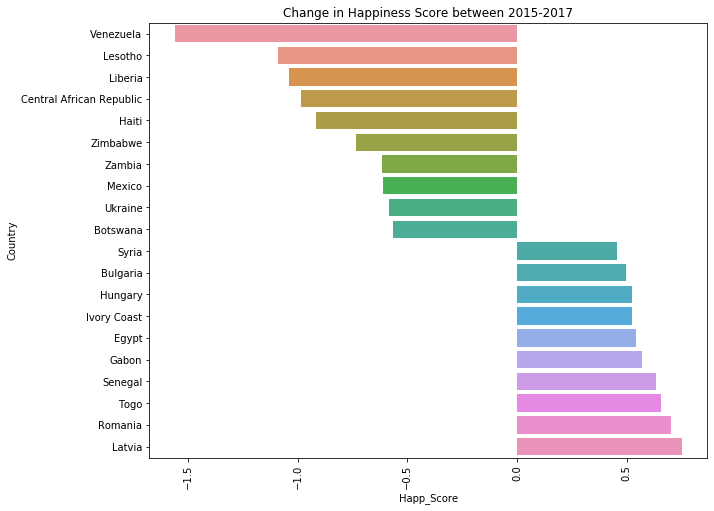

In [144]:
plt.figure(figsize=(10,8))
sns.barplot(y='Country', x='Happ_Score', data=diff_total, orient='h')
plt.xticks(rotation=90)
plt.title('Change in Happiness Score between 2015-2017')
plt.show()

<b> Latvia </b> has the most increased value and <b>Venezuela</b> has the most decreased value of happiness change between 2015-2017. It is worth mentioning that countries with highest happiness scores are not available in these lists.

Venezuela has a dramatic decrease. Its negative change in happiness score is nearly 3 times the increase of Latvia. 

Let's see all the factors affecting happiness score by each region. This time, we make a new categorical variable with `GDP`. 

In [123]:
Columns_win= ['Happ_Score', 'GDP', 'Winsorized_Family', 'Life_Exp',\
              'Freedom', 'Winsorized_Generosity', 'Winsorized_Trust_Gov', 'Winsorized_Dystopia']

In [90]:
#binned GDP
targets = ['Low', 'Mid', 'Top']
df_win['Target_GDP'] = pd.qcut(df_win['GDP'], len(targets), labels=targets)

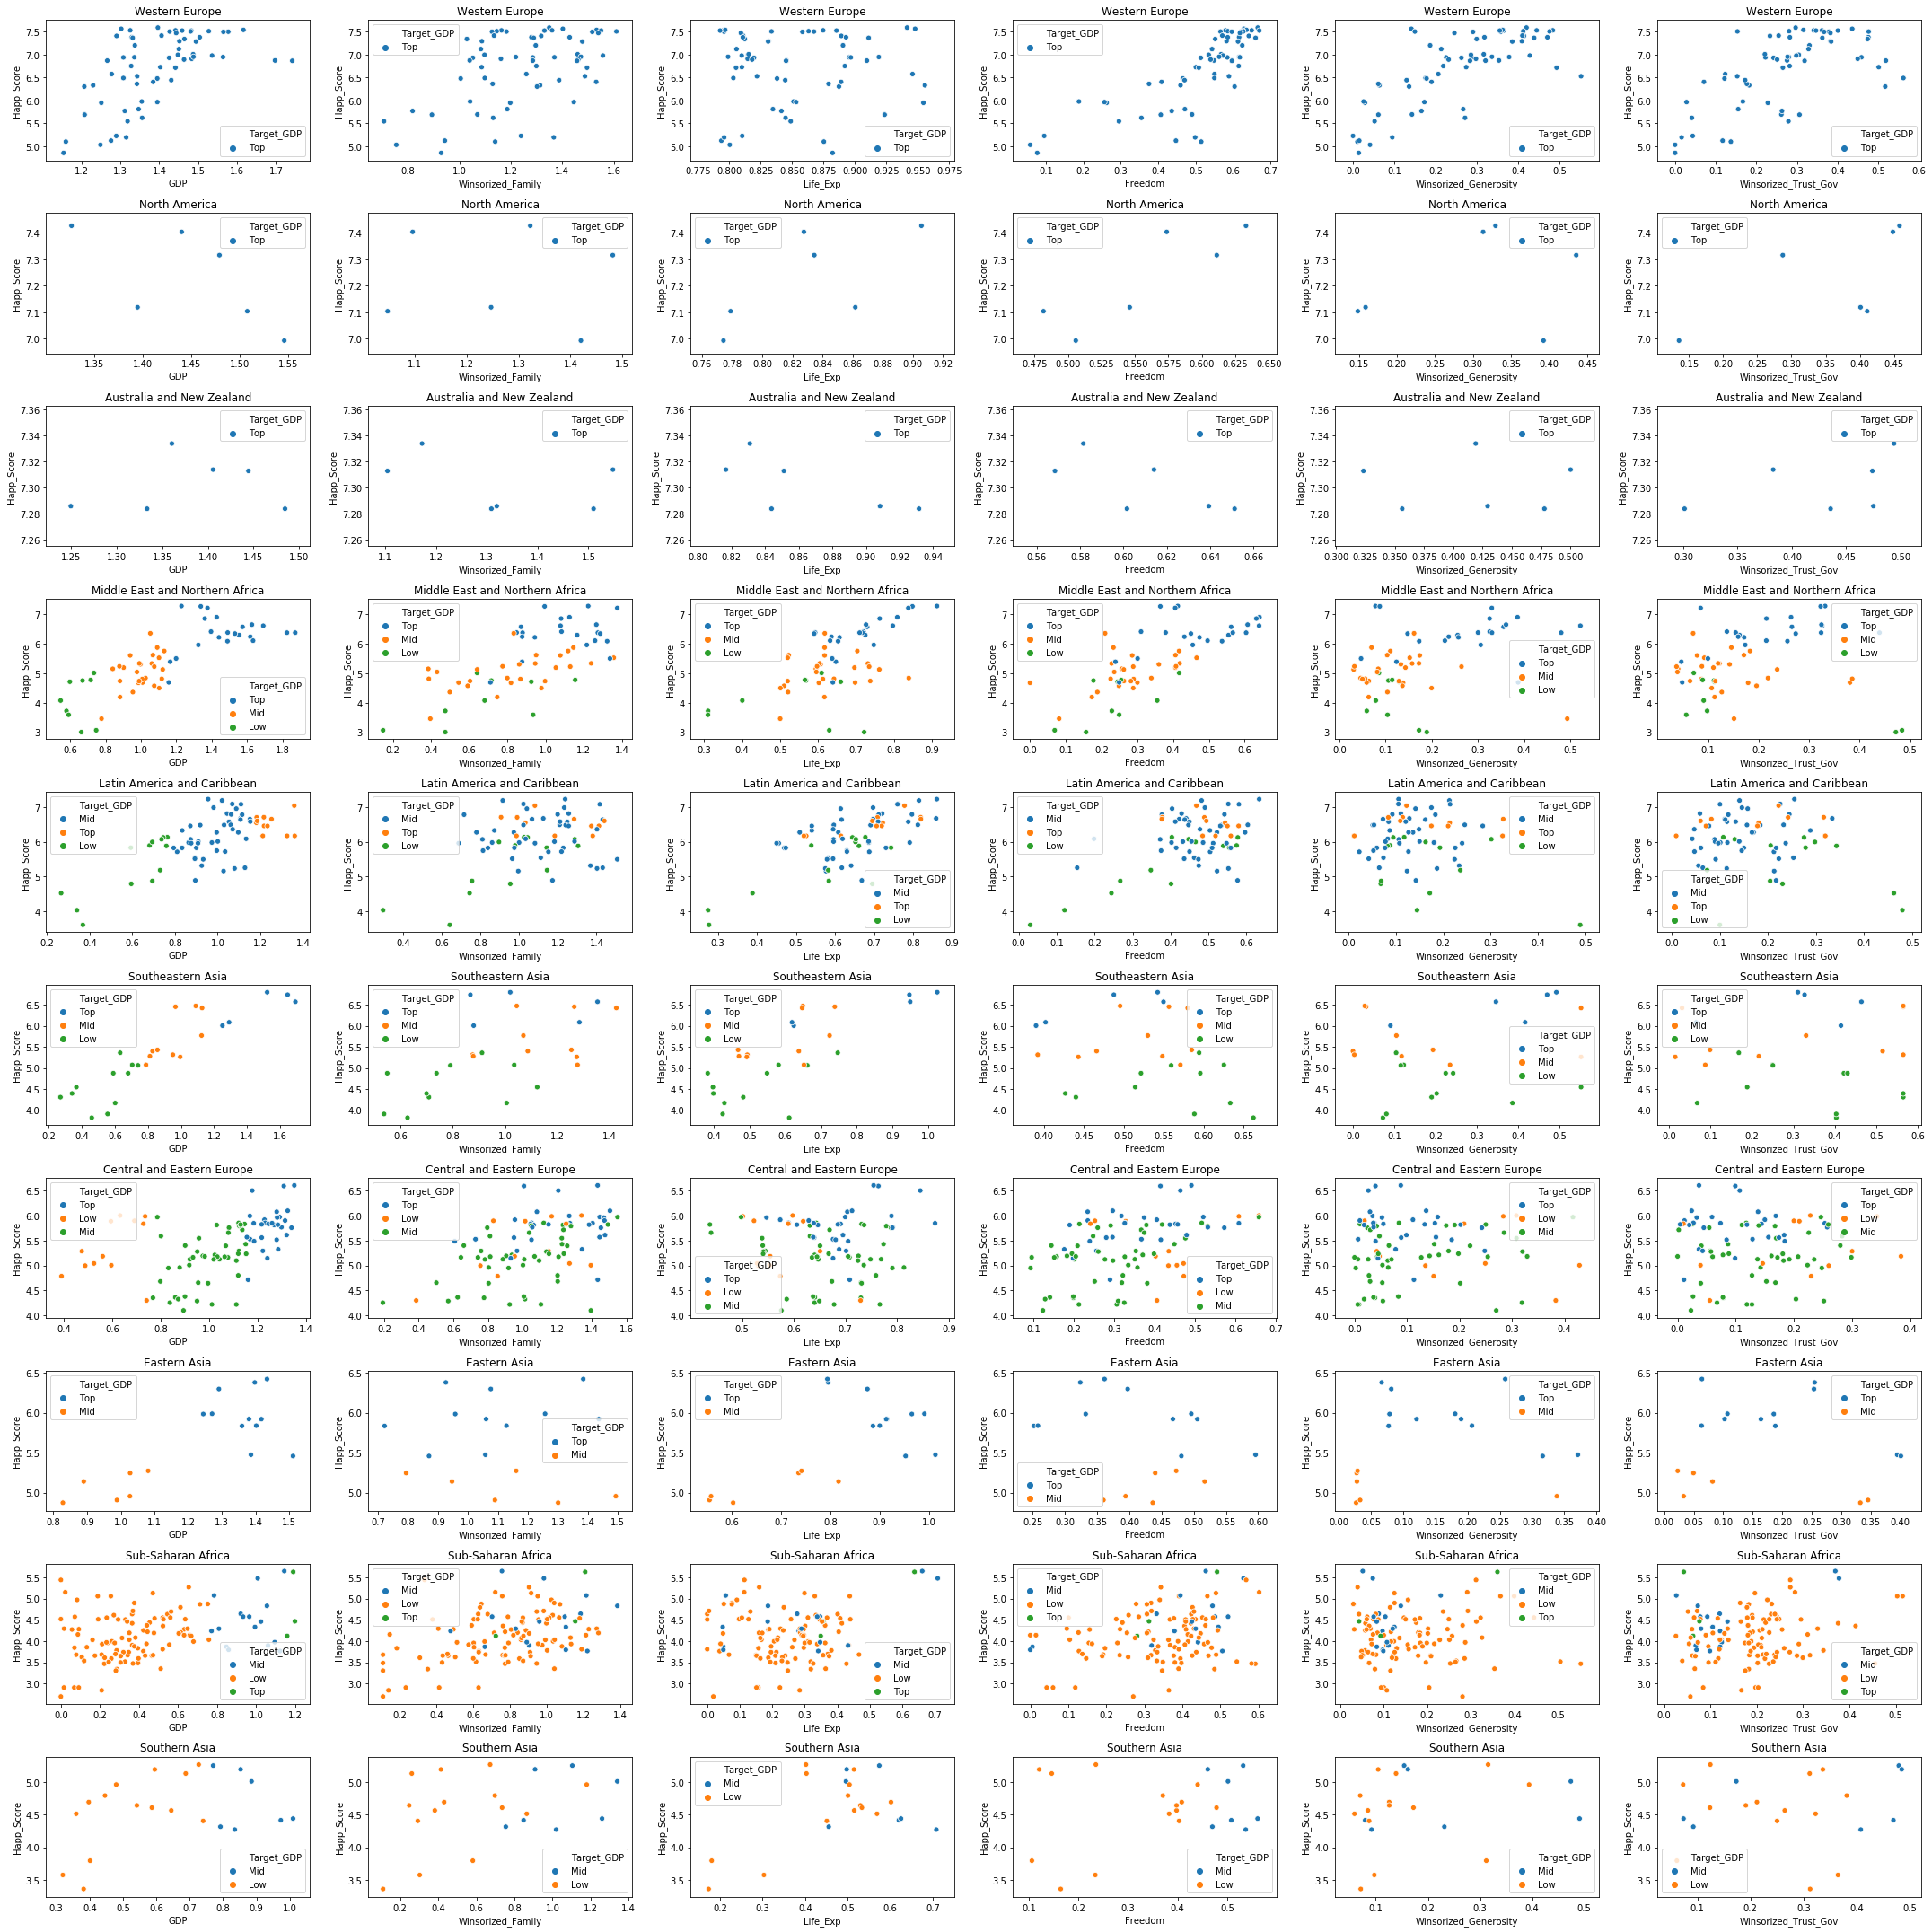

In [104]:
plt.figure(figsize=(30,30))
for i, region in enumerate(Regions):
    for j, col in enumerate(Columns_win[1:-1]):
        k= 6*i+j
        plt.subplot(10,6,k+1)
        sns.scatterplot(x=col, y= 'Happ_Score', data= df_win[df_win.Region == region], hue='Target_GDP')
        plt.title(region)
plt.tight_layout()
plt.show()      

From the pairplot above, we see that in Western Europe, where every country has top `GDP` values, `Happ_Score` increases with increasing `GDP` however, two countries with top GDP scores have lower `Happ_Score` than a quite large amount of countries. We see the same pattern in North America where countries with high GDP values have lower Happ_Score than others. We observe a strong correlation between `Happ_Score` and `GDP` in Middle East, Latin America, Eastern and Southeastern Asia. In Sub-Saharan Africa and Southern Asia, we do not find a correlation between these two variables. However in these regions, there are not or limited number of countries with top `GDP`. We could make such an interpretation that happiness increases with wealth but after a certain wealth, it does not increase happiness proportinately. 

When we analyze countries by regions, Family effect has almost lost. The most apparent relationship between `Happ_score` and `Family` is in Middle East and North Africa. Sub-Saharan Africa and Central Europe can be considered from that group. 

Southeastern Asia, Latin America and Middle East and Northern Africa have moderate relationships between `Happ_Score` and `Life_Exp`. In top GDP regions, there is not an apparent relation between these variables. 

There is a good correlation between `Happ_Score` and `Freedom` in West Europe and Middle East countries. In Latin America countries with low GDP values have more evident relation between happiness and freedom than others.

From the correlation matrix, we see that correlation between `Generosity` and `Happ_Score` is 0,29 which is not much significant however when we analyze by regions, we see that there is a strong correlation between these variables in Western Europe which is 0,74. 

Finally the hidden correlation between `Trust_Gov` and `Happ_Score` is evident in Western Europe.

In [96]:
df_win.groupby('Target_GDP').describe().Happ_Score

,count,mean,std,min,25%,50%,75%,max
Target_GDP,,,,,,,,
Low,157.0,4.355057,0.747570,2.693,3.794,4.2920,4.79500,6.130
Mid,156.0,5.353442,0.799216,3.462,4.811,5.2575,5.82325,7.226
Top,157.0,6.403573,0.762209,4.121,5.848,6.4220,6.99400,7.587


In [1]:
df_win.to_csv('reg_data.csv')

NameError: name 'df_win' is not defined

Let's make two groups with countries high and low GDP and investigate factors affecting Happ_Score. 

In [147]:
df_GDPtop = df_win[df_win.Target_GDP == 'Top']
df_GDPlow = df_win[df_win.Target_GDP == 'Low']

In [148]:
df_GDPtop = df_GDPtop[['Happ_Score','GDP', 'Winsorized_Family', 'Life_Exp','Freedom',\
                 'Winsorized_Generosity', 'Winsorized_Trust_Gov', 'Winsorized_Dystopia', 'Target_GDP']]
df_GDPlow = df_GDPlow[['Happ_Score','GDP', 'Winsorized_Family', 'Life_Exp','Freedom',\
                 'Winsorized_Generosity', 'Winsorized_Trust_Gov', 'Winsorized_Dystopia', 'Target_GDP']]

In [149]:
df_GDPtop.corr()

,Happ_Score,GDP,Winsorized_Family,Life_Exp,Freedom,Winsorized_Generosity,Winsorized_Trust_Gov,Winsorized_Dystopia
Happ_Score,1.000000,0.470177,0.386061,0.428505,0.712032,0.575604,0.633734,0.598476
GDP,0.470177,1.000000,0.165171,0.192842,0.451075,0.590654,0.405713,-0.104450
Winsorized_Family,0.386061,0.165171,1.000000,0.134687,0.410951,0.290393,0.026735,-0.141284
Life_Exp,0.428505,0.192842,0.134687,1.000000,0.347755,0.271758,0.431385,0.005283
Freedom,0.712032,0.451075,0.410951,0.347755,1.000000,0.629104,0.636033,0.056078
Winsorized_Generosity,0.575604,0.590654,0.290393,0.271758,0.629104,1.000000,0.401896,-0.066744
Winsorized_Trust_Gov,0.633734,0.405713,0.026735,0.431385,0.636033,0.401896,1.000000,0.166486
Winsorized_Dystopia,0.598476,-0.104450,-0.141284,0.005283,0.056078,-0.066744,0.166486,1.000000


In countries with top `GDP` scores; `Freedom`, `Trust_Gov`, `Generosity` and `GDP` are the most correlated variables with `Happ_Score` respectively. We did not observe this result when we calculate correlations of all countries together. Correlation with `Trust_Gov` ad `Generosity` is lower when all countries are considered together. 

In [150]:
df_GDPlow.corr()

,Happ_Score,GDP,Winsorized_Family,Life_Exp,Freedom,Winsorized_Generosity,Winsorized_Trust_Gov,Winsorized_Dystopia
Happ_Score,1.000000,0.492436,0.482778,0.485925,0.366541,-0.015959,0.087251,0.603465
GDP,0.492436,1.000000,0.279312,0.498103,0.092002,-0.070616,-0.109478,-0.017510
Winsorized_Family,0.482778,0.279312,1.000000,0.188447,0.197360,0.212911,-0.251882,-0.115726
Life_Exp,0.485925,0.498103,0.188447,1.000000,0.271778,0.007552,0.199986,-0.092365
Freedom,0.366541,0.092002,0.197360,0.271778,1.000000,0.202273,0.164106,-0.091693
Winsorized_Generosity,-0.015959,-0.070616,0.212911,0.007552,0.202273,1.000000,-0.240922,-0.332655
Winsorized_Trust_Gov,0.087251,-0.109478,-0.251882,0.199986,0.164106,-0.240922,1.000000,0.006552
Winsorized_Dystopia,0.603465,-0.017510,-0.115726,-0.092365,-0.091693,-0.332655,0.006552,1.000000


In low GDP countries; `GDP`, `Life_Exp`, `Family` and `Freedom` are the most correlated variables with `Happ_Score`. 

A final representation for world-wide Happiness Score.

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot
data = dict(type = 'choropleth',
           locations = df['Country'],
           locationmode = 'country names',
           colorscale='Viridis',
           z = df['Happ_Score'],
           text = df['Country'],
           colorbar = {'title':'Happiness Score'})
layout = dict(title = 'Geographical Visualization of Happiness Score for 2015',
              geo = dict(showframe = True, projection = {'type': 'equirectangular'}))
colormap = go.Figure(data = [data], layout=layout)
iplot(colormap)

### PCA

In [156]:
df_pca=df_win[['Happ_Score', 'GDP', 'Winsorized_Family', 'Winsorized_Generosity', 'Winsorized_Trust_Gov', 'Winsorized_Dystopia', 'Freedom', 'Life_Exp'  ]]

In [158]:
X = df_pca.values

In [160]:
X = StandardScaler().fit_transform(df_pca)
pca = PCA(n_components=8) 
principalComponents=pca.fit_transform(X)

In [161]:
exp_var= pca.explained_variance_ratio_  #altcizgi gerekli burda
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)  ##cumulative sum
print(exp_var)
print('='*75)
print(cumsum_var)

[4.42551679e-01 1.63768108e-01 1.51908049e-01 1.05462598e-01
 6.74533921e-02 4.50456471e-02 2.37685191e-02 4.20075982e-05]
[ 44.26  60.64  75.83  86.38  93.13  97.63 100.01 100.01]


From the above PCA analysis, we found that we need 4 components in order to explain more 80% variance in data. 

### An extension with global terror data

In [162]:
terror = pd.read_csv('terror_new.csv')

In [163]:
terror.head()

,Unnamed: 0,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type
0,141195,2015,1,3,Iraq,Baghdad,Middle East & North Africa,Baghdad,33.303566,44.371773,Bombing/Explosion,2.0,5.0,Minibus,01/03/2015: An explosive device planted on a m...,Unknown,Private Citizens & Property,Explosives
1,141886,2015,1,1,Bosnia-Herzegovina,Federation of Bosnia and Herzegovina,Eastern Europe,Trnovi,45.183961,15.828342,Armed Assault,0.0,1.0,Imam: Selvedin Beganovic,01/01/2015: Assailants stabbed Selvedin Begano...,Muslim extremists,Religious Figures/Institutions,Melee
2,142238,2015,1,1,Iraq,Baghdad,Middle East & North Africa,Baghdad,33.303566,44.371773,Bombing/Explosion,1.0,1.0,Lecturer,01/01/2015: An explosive device planted in a v...,Unknown,Educational Institution,Explosives
3,142239,2015,1,1,Sweden,Uppsala,Western Europe,Uppsala,59.857979,17.639822,Facility/Infrastructure Attack,0.0,0.0,Mosque,01/01/2015: An assailant threw an explosive de...,Unknown,Religious Figures/Institutions,Incendiary
4,142240,2015,1,1,Libya,Benghazi,Middle East & North Africa,Benghazi,32.069286,20.151144,Bombing/Explosion,NaN,NaN,204 Camp,01/01/2015: Assailants attacked a Haftar milit...,Shura Council of Benghazi Revolutionaries,Terrorists/Non-State Militia,Explosives


In [164]:
df_killed = terror.groupby(['Country', 'Year']).Killed.sum().reset_index()

In [ ]:
df_killed

In [165]:
df_terror = df_win.merge(df_killed, on=['Year', 'Country'])

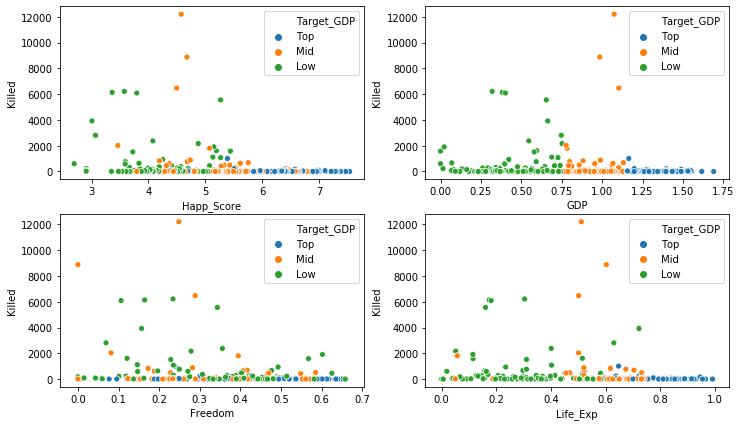

In [177]:
Columns= ['Happ_Score', 'GDP', 'Freedom', 'Life_Exp']
plt.figure(figsize=(12,7))
for i, var in enumerate(Columns):
    plt.subplot(2,2,i+1)
    sns.scatterplot(y='Killed', x=var, data= df_terror, hue='Target_GDP')
    
plt.show()

We do not observe a relation between number of killed persons with these selected variables such that `GDP`, `Freedom`, `Happ_Score` and `Life_Exp`. Let's look at the correlation matrix.

In [178]:
df_terror.corr()

,Year,Happ_Rank,Happ_Score,GDP,Family,Life_Exp,Freedom,Generosity,Trust_Gov,Dystopia,Winsorized_Family,Winsorized_Generosity,Winsorized_Trust_Gov,Winsorized_Dystopia,Killed
Year,1.000000,0.000582,-0.020454,0.087061,0.237264,-0.182696,-0.042825,0.343862,-0.353418,-0.149255,0.238794,0.344324,-0.362194,-0.150717,-0.040965
Happ_Rank,0.000582,1.000000,-0.993301,-0.818585,-0.641345,-0.744413,-0.555969,-0.254027,-0.157254,-0.538499,-0.641986,-0.268089,-0.175608,-0.541051,0.221991
Happ_Score,-0.020454,-0.993301,1.000000,0.815055,0.639651,0.744715,0.573907,0.264647,0.181410,0.542734,0.639570,0.278966,0.199758,0.545081,-0.223758
GDP,0.087061,-0.818585,0.815055,1.000000,0.587983,0.807880,0.309067,0.155108,0.012845,0.157967,0.586867,0.169986,0.031764,0.162596,-0.131646
Family,0.237264,-0.641345,0.639651,0.587983,1.000000,0.477773,0.475754,0.277536,-0.112368,-0.047951,0.999630,0.281508,-0.107733,-0.045744,-0.267847
Life_Exp,-0.182696,-0.744413,0.744715,0.807880,0.477773,1.000000,0.345012,0.095327,0.129491,0.106708,0.475882,0.104153,0.142100,0.110814,-0.188257
Freedom,-0.042825,-0.555969,0.573907,0.309067,0.475754,0.345012,1.000000,0.423524,0.319336,0.103160,0.478728,0.431248,0.330009,0.100785,-0.266684
Generosity,0.343862,-0.254027,0.264647,0.155108,0.277536,0.095327,0.423524,1.000000,0.018220,-0.119147,0.279437,0.992155,0.018222,-0.121797,-0.042619
Trust_Gov,-0.353418,-0.157254,0.181410,0.012845,-0.112368,0.129491,0.319336,0.018220,1.000000,0.043171,-0.114033,0.022705,0.990079,0.043837,0.022668
Dystopia,-0.149255,-0.538499,0.542734,0.157967,-0.047951,0.106708,0.103160,-0.119147,0.043171,1.000000,-0.047083,-0.107410,0.059284,0.999538,-0.058867


We also failed to find a significant correlation between `Killed` and other variables. 

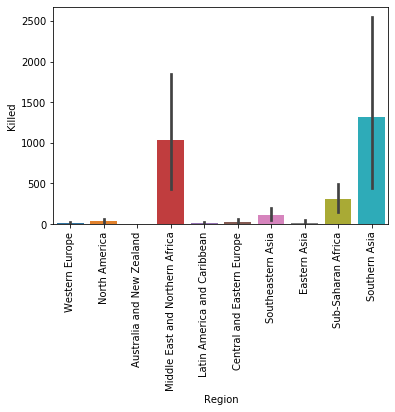

In [203]:
sns.barplot(y='Killed', data=df_terror, x='Region')
plt.xticks(rotation=90)
plt.show()

The highest number of total `Killed` is in Southern Asia and Middle-East and Northern Africa.

Let's group data by happiness scores. 

In [184]:
df_ttop = df_terror[df_terror.Target_Happ == 'Top']
df_tmid = df_terror[df_terror.Target_Happ == 'Mid']
df_tlow = df_terror[df_terror.Target_Happ == 'Low']

In [200]:
df_ttop.Killed.describe()

count    101.000000
mean      18.336634
std       39.382808
min        0.000000
25%        0.000000
50%        1.000000
75%        9.000000
max      213.000000
Name: Killed, dtype: float64

In [201]:
df_tmid.Killed.describe()

count      83.000000
mean      268.903614
std       756.411274
min         0.000000
25%         0.000000
50%         6.000000
75%        65.000000
max      5559.000000
Name: Killed, dtype: float64

In [202]:
df_tlow.Killed.describe()

count      105.000000
mean       688.466667
std       1901.147690
min          0.000000
25%          3.000000
50%         53.000000
75%        281.000000
max      12207.000000
Name: Killed, dtype: float64

We observe that the average and max number of killed person are highest in low happiness level countries and vice versa.  

In [204]:
fig= px.scatter(df_ttop, x= 'Killed',y ='Happ_Score', color='Target_GDP', hover_data=['Killed', 'Country', 'GDP', 'Year'], 
               title='Countries with Top Happ_Score')

fig.show()
fig= px.scatter(df_tmid, x= 'Killed',y ='Happ_Score', color='Target_GDP',hover_data=['Killed', 'Country', 'GDP', 'Year'],
               title='Countries with Mid Happ_Score')
fig.show()
fig= px.scatter(df_tlow, x= 'Killed',y ='Happ_Score', color='Target_GDP',hover_data=['Killed', 'Country', 'GDP', 'Year'],
               title='Countries with Low Happ_Score')
fig.show()

### Discussion

The first analyses showed that happiness is strongly correlated with GDP, Family and Life_Exp variables. However, when we made analysis according to regions, we have found a different result: There is still a strong correlation between happiness and above variables in low level GDP countries, but this order changes in top level GDP countries. In top GDP countries, Freedom, Trust_Gov and Generosity variables are more correlated with happiness. GDP comes later in these countries. 

In general, GDP is a determinant variable for happiness, however after a certain wealth level, its effect becomes limited. We have refered to Maslow's Hierarchy of Needs above. The fourth level in the hierarchy is Esteem which includes freedom, respect, status etc. This level is in accordance with Freedom variable in our data. The last level which is Self-Actualizatin covers morality, problem solving, lack of prejudice etc. 

In summary, people are happier as they meet their needs, and as needs are satisfied, the increase in the previous levels does not affect the wellbeing status of humans.